# Churn Telecom Project
**Authors:** Elena Burlando

## Overview

The objective of this project is to analize Telecom Customer data in order to gain insights on what is contributing to customer churn. 

As an outcome of this analysis we are aiming to get: 
 * factors contributing to customer churn 
 * reccommendations on preventive measures to reduce customers leaving

## Business Problem

Telecom company is experiencing 14.5% churn of its customers. As it is costly to the company to lose every seventh of its clients and it is also costly to acquire new clients. It is important to identify why customers are leaving to come up with preventive measures. 

One of the main pain points for this project is the lack of industry/business knowledge.

### Data Understanding 

* [Telecom Churn data](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

The dataset has 21 columns (including the target column) and 3333 rows of data entries. 

**Predictors**: 
       'state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'
***
* The target variable is churn.  
* The main score is f1. 
* We intend to use Classifiers such as Decision Tree, Random Forest, and Logistic Regression to calculate formula to predict whether a customer will churn.  
* For hyper parameter tuning we will use GridSearchCV and RandomSearchCV. 
* We will be following CRISP-DM process for this project. 
***

### EDA

In [1]:
# import libraries 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats
import pickle
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, fbeta_score,\
classification_report, log_loss, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
#import data
df = pd.read_csv('churn_telecom.csv')
print(df.shape)
print(df.info())
df.head()

(3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [3]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [4]:
#describe categorical columns
df.describe(include = ['O'])

state phone number international plan voice mail plan
count   3333         3333               3333            3333
unique    51         3333                  2               2
top       WV     347-5063                 no              no
freq     106            1               3010            2411

In [5]:
# checking if there are any duplicates in 'phone number' column and whether is should be treated as ID column. 
duplicates = df[df['phone number'].duplicated()]
len(duplicates)

0

In [6]:
df['phone number'].nunique()

3333

Each row belongs to a unique client (phone number). 

In [7]:
# Number of customers who churned
print(df.churn.value_counts())
print(df.churn.value_counts(normalize=True))

False    2850
True      483
Name: churn, dtype: int64
False    0.855086
True     0.144914
Name: churn, dtype: float64


The dataset is imbalanced with 14.5% churned customers. Baseline score is 85.5% meaning that our final model's accuracy score should be higher than baseline score. 

In [8]:
# Visually inspecting examples of the customers who churned
df_churn = df[df.churn==True]
df_churn.head(20)

state  account length  area code phone number international plan  \
10     IN              65        415     329-6603                 no   
15     NY             161        415     351-7269                 no   
21     CO              77        408     393-7984                 no   
33     AZ              12        408     360-1596                 no   
41     MD             135        408     383-6029                yes   
48     ID             119        415     398-1294                 no   
54     WY              87        415     353-3759                 no   
57     CO             121        408     370-7574                 no   
69     TX             150        510     374-8042                 no   
76     DC              82        415     374-5353                 no   
77     NY             144        408     360-1171                 no   
84     TX             106        510     395-3026                 no   
86     IN              94        408     402-1251                 no   
89     NJ             128        415     358-9095                 no   
91     LA             155        415     334-1275                 no   
98     MS             120        408     355-6291                 no   
99     ID              77        415     362-9748                 no   
115    ME              36        510     363-1069                yes   
117    NV              74        415     355-6837                 no   
126    MS             162        415     335-4858                 no   

    voice mail plan  number vmail messages  total day minutes  \
10               no                      0              129.1   
15               no                      0              332.9   
21               no                      0               62.4   
33               no                      0              249.6   
41              yes                     41              173.1   
48               no                      0              159.1   
54               no                      0              151.0   
57              yes                     30              198.4   
69               no                      0              178.9   
76               no                      0              300.3   
77               no                      0               61.6   
84               no                      0              210.6   
86               no                      0              157.9   
89               no                      0              237.9   
91               no                      0              203.4   
98               no                      0              212.1   
99               no                      0              251.8   
115             yes                     42              196.8   
117              no                      0              282.5   
126              no                      0               70.7   

     total day calls  total day charge  ...  total eve calls  \
10               137             21.95  ...               83   
15                67             56.59  ...               97   
21                89             10.61  ...              121   
33               118             42.43  ...              119   
41                85             29.43  ...              107   
48               114             27.05  ...              117   
54                83             25.67  ...              116   
57               129             33.73  ...               77   
69               101             30.41  ...              110   
76               109             51.05  ...              100   
77               117             10.47  ...               85   
84                96             35.80  ...               85   
86               105             26.84  ...              101   
89               125             40.44  ...               93   
91               100             34.58  ...              104   
98               131             36.06  ...              104   
99                72             42.8

In [9]:
# Looking at 'state' & 'area code' predictors
df.groupby(['state']).agg({'phone number':'count', 'churn':'mean'}
                                  ).sort_values(by='churn', ascending=False).reset_index()

state  phone number     churn
0     NJ            68  0.264706
1     CA            34  0.264706
2     TX            72  0.250000
3     MD            70  0.242857
4     SC            60  0.233333
5     MI            73  0.219178
6     MS            65  0.215385
7     NV            66  0.212121
8     WA            66  0.212121
9     ME            62  0.209677
10    MT            68  0.205882
11    AR            55  0.200000
12    KS            70  0.185714
13    NY            83  0.180723
14    MN            84  0.178571
15    PA            45  0.177778
16    MA            65  0.169231
17    CT            74  0.162162
18    NC            68  0.161765
19    NH            56  0.160714
20    GA            54  0.148148
21    DE            61  0.147541
22    OK            61  0.147541
23    OR            78  0.141026
24    UT            72  0.138889
25    CO            66  0.136364
26    KY            59  0.135593
27    SD            60  0.133333
28    OH            78  0.128205
29    FL            63  0.126984
30    IN            71  0.126761
31    ID            73  0.123288
32    WY            77  0.116883
33    MO            63  0.111111
34    VT            73  0.109589
35    AL            80  0.100000
36    NM            62  0.096774
37    ND            62  0.096774
38    WV           106  0.094340
39    TN            53  0.094340
40    DC            54  0.092593
41    RI            65  0.092308
42    WI            78  0.089744
43    IL            58  0.086207
44    NE            61  0.081967
45    LA            51  0.078431
46    IA            44  0.068182
47    VA            77  0.064935
48    AZ            64  0.062500
49    AK            52  0.057692
50    HI            53  0.056604

In [10]:
df.groupby(['area code']).agg({'phone number':'count', 'churn':'mean'}
                                  ).sort_values(by='churn', ascending=False).reset_index()

area code  phone number     churn
0        510           840  0.148810
1        408           838  0.145585
2        415          1655  0.142598

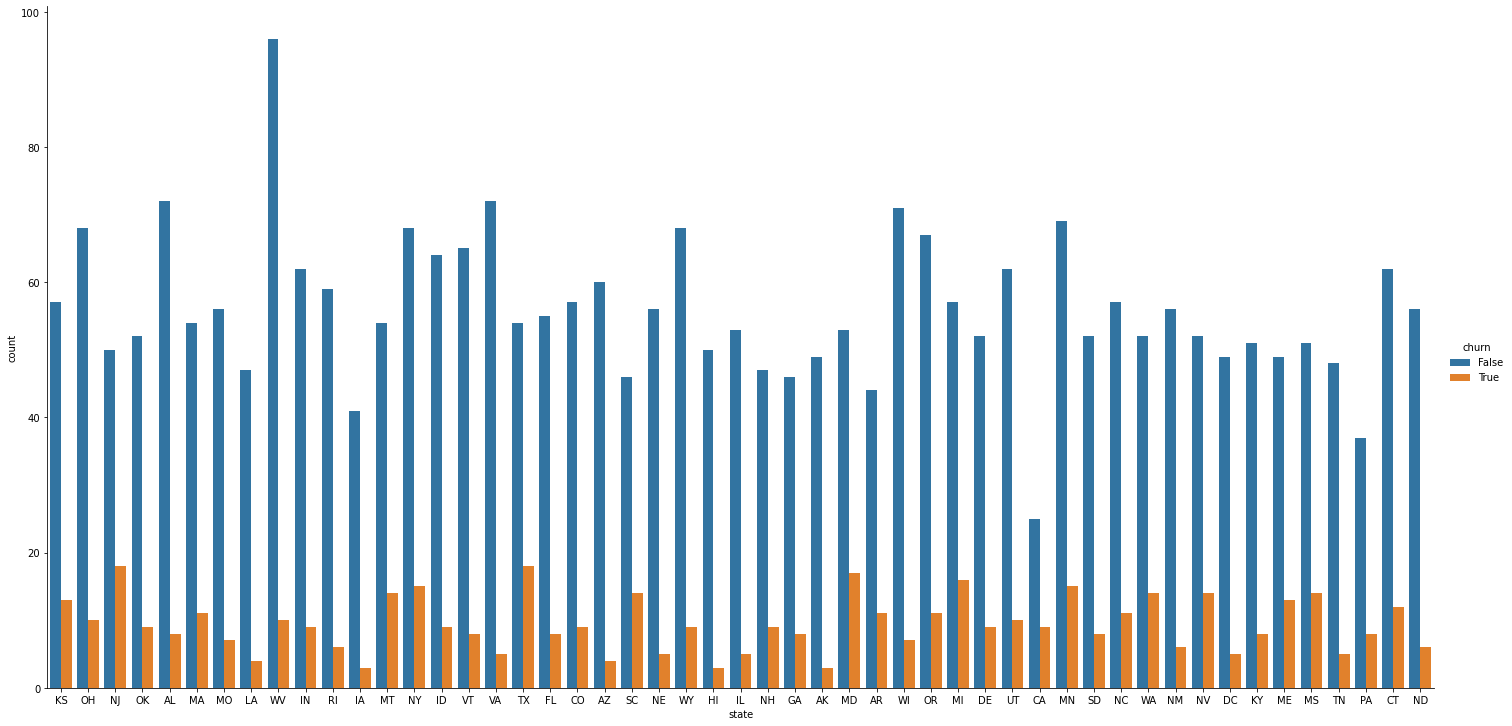

In [11]:
g = sns.catplot(x='state', kind="count", hue='churn', data=df, height=10, aspect=2)

We have three Bay Area, CA area codes listed under all 50 states and Washington DC. 

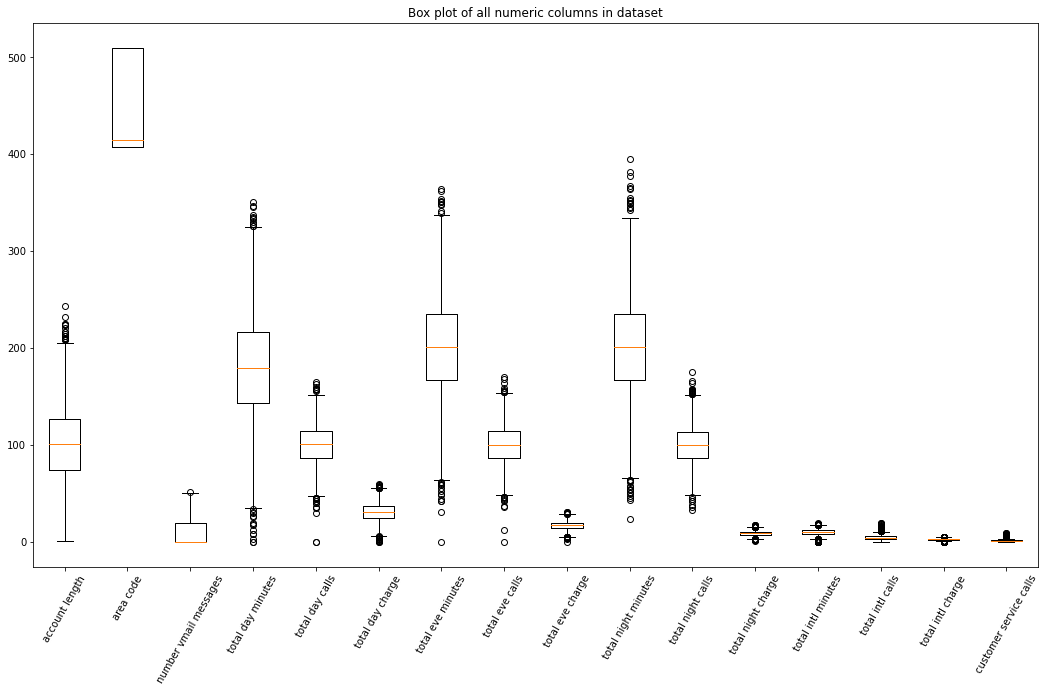

In [12]:
#Create a box plot of each numeric column to review feature distribution
df_num = df.select_dtypes('number')

plt.figure(figsize=(18,10))
plt.boxplot([df_num[col] for col in df_num.columns])
plt.title("Box plot of all numeric columns in dataset")
plt. margins(x=1)
plt.xticks(range(1, 17), df_num.columns.values, rotation=60)
plt.show();



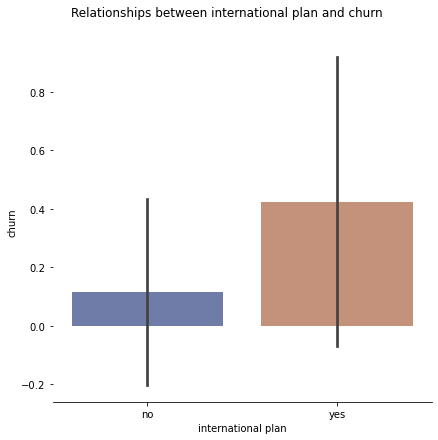

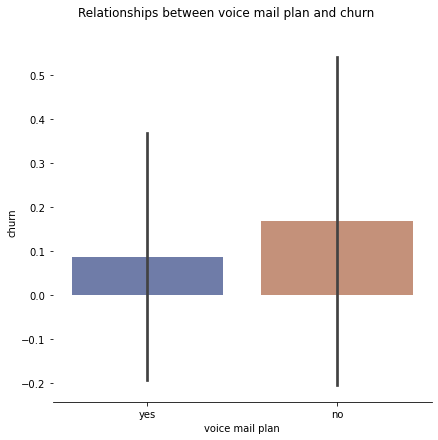

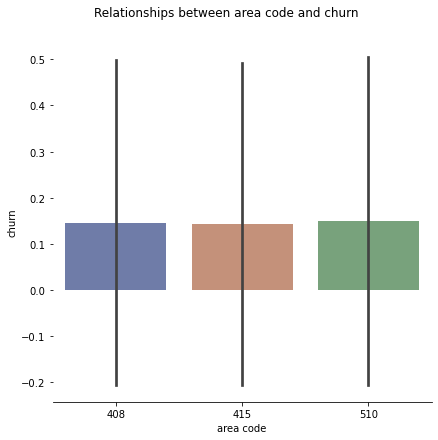

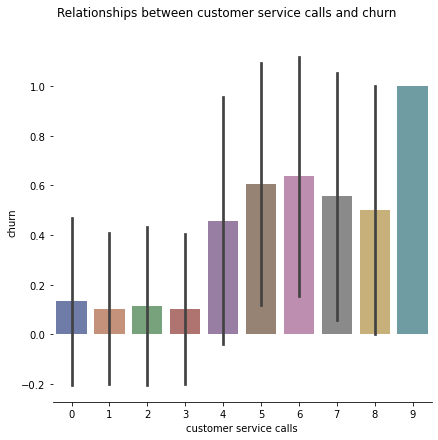

In [13]:
# Plotting relationships between 'international plan', 'voice mail plan', 'area code', 'customer service calls' 
# and churn. 

df_cat = df[['international plan', 'voice mail plan', 'area code', 'customer service calls']]

for col in df_cat.columns:
    g = sns.catplot(
    data=df, kind='bar',
    x=col, y='churn',
    ci="sd", palette='dark', alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels(f'{col}', 'churn')
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Relationships between {col} and churn');


- It appears that customers with international plan are almost 30% likely to churn compare to clients without international plan. 
- Customers without voice mail plan are about 10% more likely to churn compare to those with this type of plan. 
- There is no obvious difference in churn accross area codes.
- The numbner of customer service calls is significantly impacting churn. If a customer made more than 3 service calls, they are around 30%+ more likely to churn with a 100% of churn likelihood reached at 9 calls. 

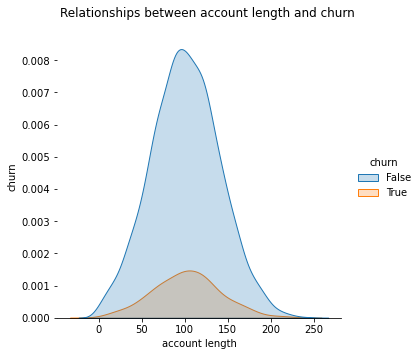

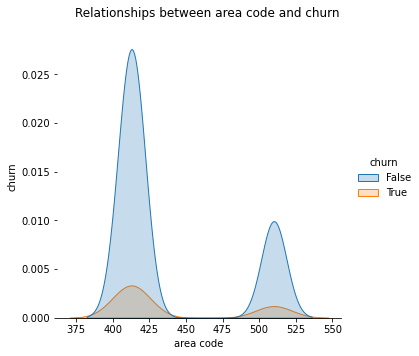

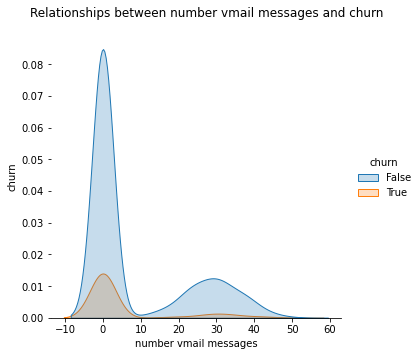

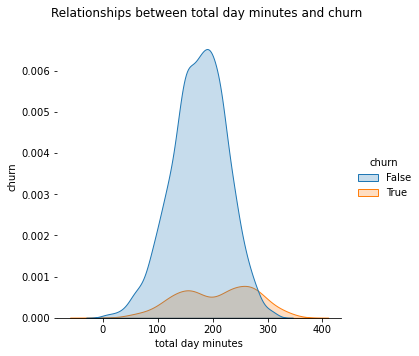

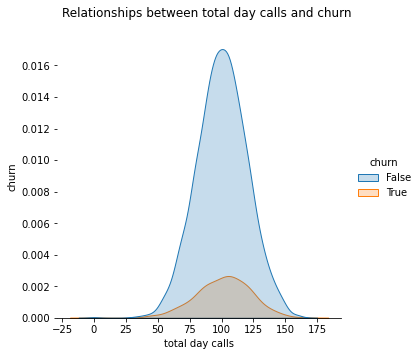

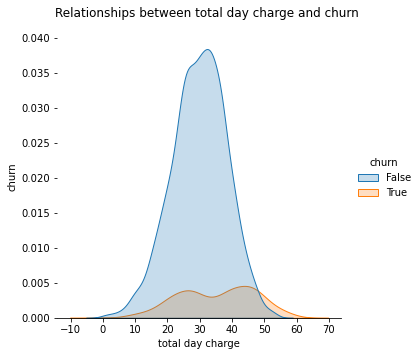

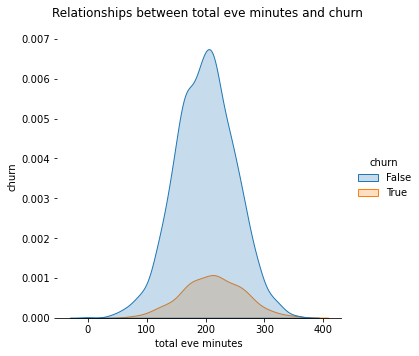

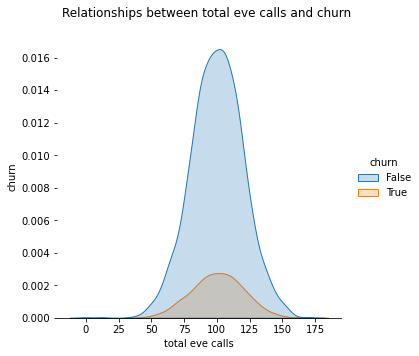

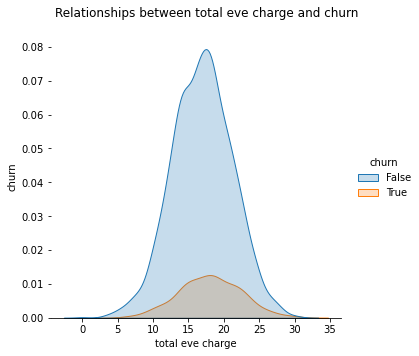

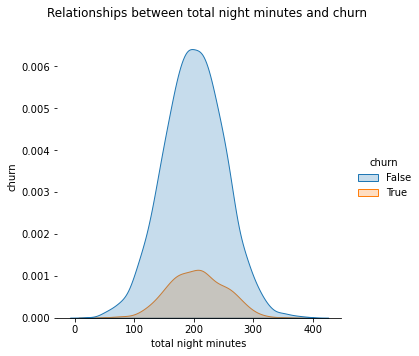

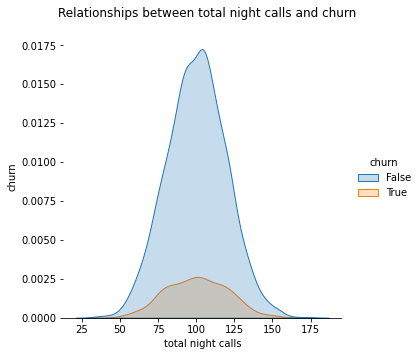

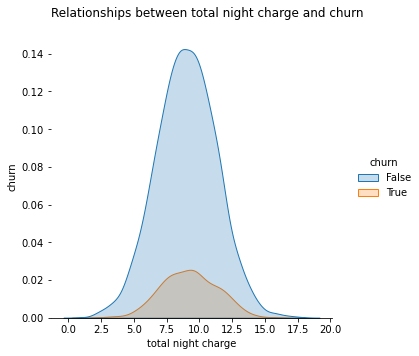

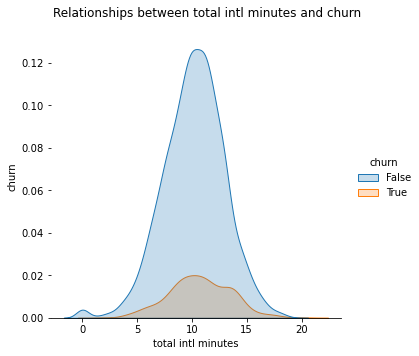

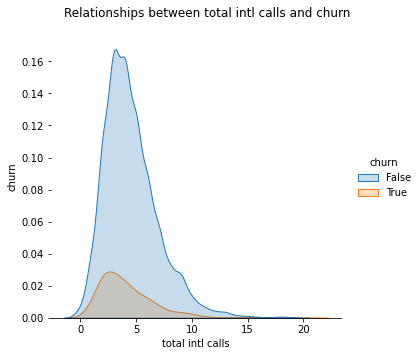

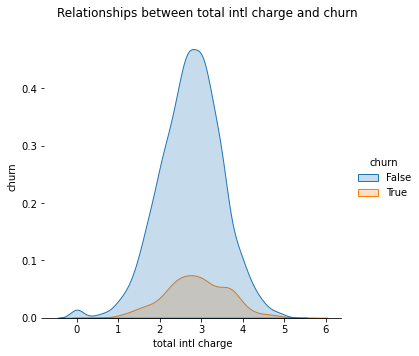

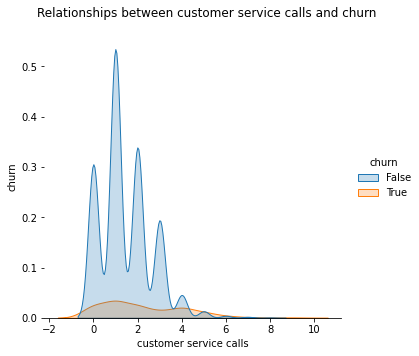

In [14]:

for col in df_num.columns:
    g = sns.displot(
    df, x=col, 
    hue='churn', kind="kde", 
    fill=True
    )
    g.despine(left=True)
    g.set_axis_labels(f'{col}', 'churn')
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Relationships between {col} and churn');

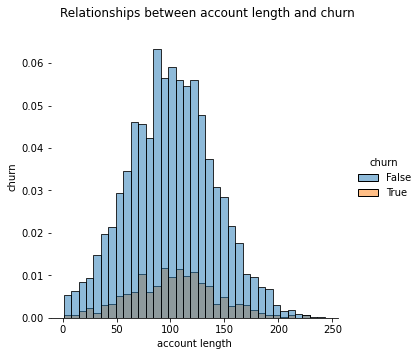

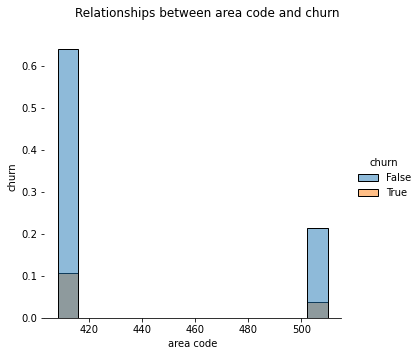

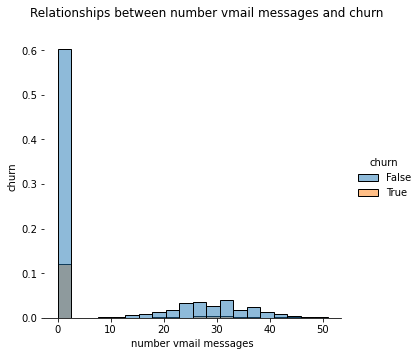

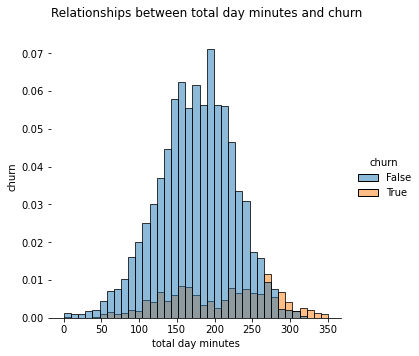

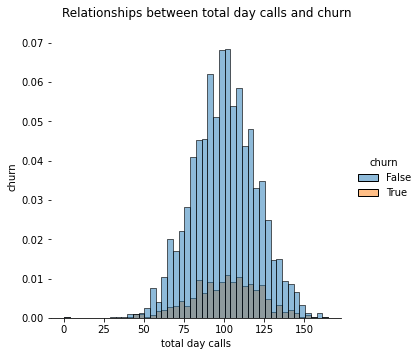

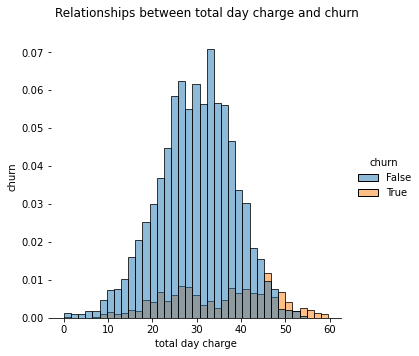

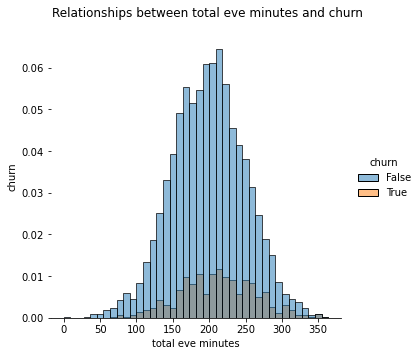

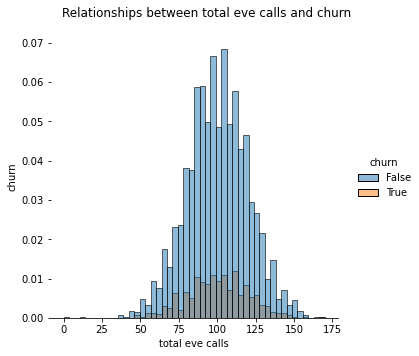

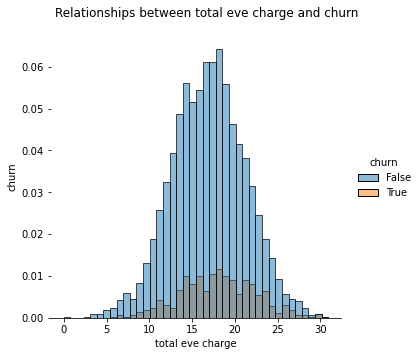

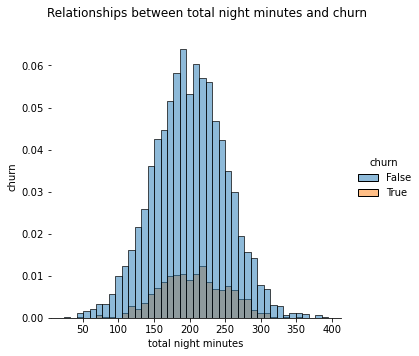

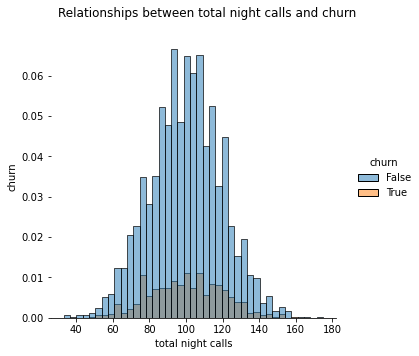

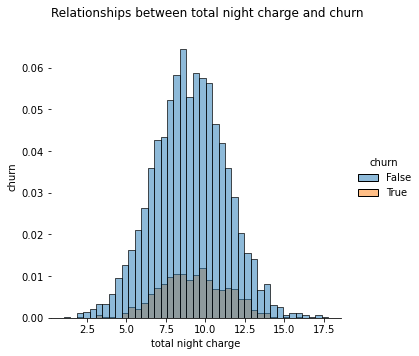

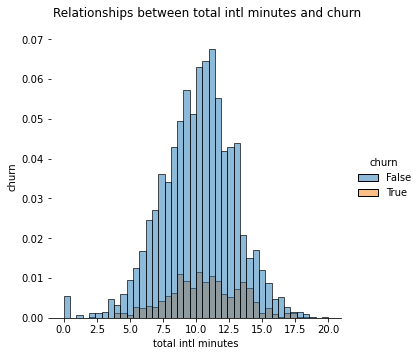

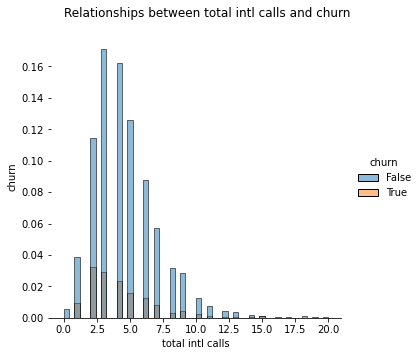

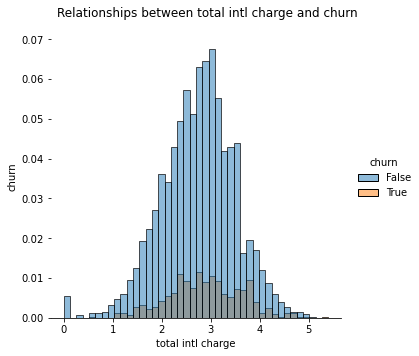

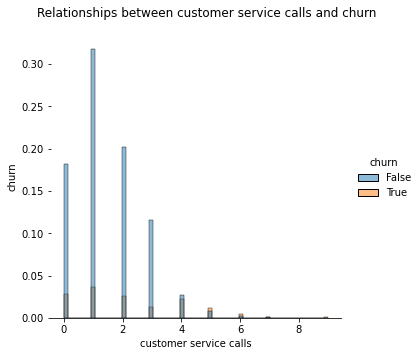

In [15]:
df_num = df.select_dtypes('number')

for col in df_num.columns:
    g = sns.displot(
    df, x=col, 
    hue='churn', stat='probability', 
    fill=True
    )
    g.despine(left=True)
    g.set_axis_labels(f'{col}', 'churn')
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Relationships between {col} and churn');

If 'total day minutes' have reached 275, it is leading to churn so as the reach of $50 on 'total day charge'. 

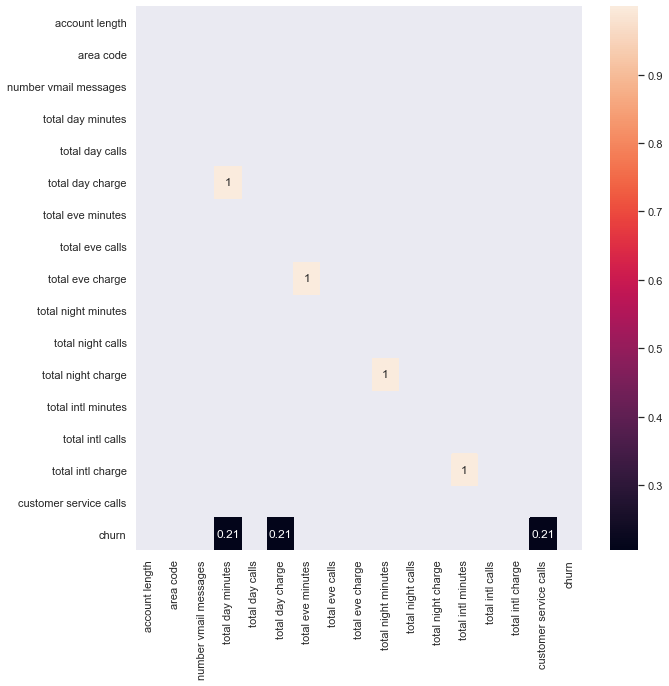

In [16]:
# Use the .heatmap method to illustrate the correlation. 
corr = df.corr()
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(corr, mask=trimask | (np.abs(corr) <= 0.15), annot=True);

In [17]:
df.corr()['churn'].map(abs).sort_values(ascending=False)

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
number vmail messages     0.089728
total intl charge         0.068259
total intl minutes        0.068239
total intl calls          0.052844
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
Name: churn, dtype: float64

According to Pearson correlation, these three features are contributing most to the target: 
- customer service calls    
- total day minutes         
- total day charge    

---
**EDA findings:** 
- Customers with 'international plan' are almost 30% likely to churn compare to clients without international plan.
- Customers without 'voice mail plan' are about 10% more likely to churn compare to those with this type of plan.
- The numbner of 'customer service calls' is significantly impacting churn. If a customer made more than 3 service calls, they are around 30%+ more likely to churn with a 100% of churn likelihood reached at 9 calls. 
- If 'total day minutes' have reached 275, it is leading to churn. 
- The reach of $50 on 'total day charge' also leads to higher probability of churn. 
- 'customer service calls', 'total day minutes', 'total day charge' each have 0.2 corrrelation with 'churn'. 

- We have three Bay Area, CA area codes listed under all 50 states and Washington DC. Churn accross three area codes is equally distributed.
---

### PREPROCESSING

#### Train-test split

In [18]:
# assign features and target

X = df.drop(columns=['churn', 'phone number'])
y = df.churn

# train-test split
SEED = 13
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=SEED)

In [19]:
# numerical features
X_train_nums = X_train.select_dtypes('number')

# categorical features for OneHotEncoder
X_train_cat = X_train.select_dtypes('object')

numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown = 'ignore',
                         sparse=False))
])


trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

### Baseline model_Decision Tree 

In [20]:
import os

In [21]:
if 'baseline_model.pkl' in os.listdir('models'):
    with open('models/baseline_model.pkl', 'rb') as f: 
        baseline_model = joblib.load(f) 
else:
    baseline_model = Pipeline(steps=[
    ('trans', trans),
    ('dt', DecisionTreeClassifier(max_depth=3, class_weight = 'balanced', 
                                 random_state=SEED))
    ])
    
    baseline_model.fit(X_train, y_train)
    
    with open('models/baseline_model.pkl', 'wb') as f:
        joblib.dump(baseline_model, f)

In [22]:
def scores(model): 
    # predictor
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Train scores
    print('Decision Tree baseline model train scores:')

    print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
    print(f'Log_loss train: {log_loss(y_train, pred_train)}')

    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    # Test scores
    print('Decision Tree baseline model test scores:')

    print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
    print(f'Log_loss test: {log_loss(y_test, pred_test)}')

    print(classification_report(y_test, pred_test))
    print(confusion_matrix(y_test, pred_test))

In [23]:
scores(baseline_model)

Decision Tree baseline model train scores:
ROC AUC score train: 0.8252956437313979
Log_loss train: 4.146379525061388
              precision    recall  f1-score   support

       False       0.96      0.90      0.93      2148
        True       0.55      0.75      0.64       351

    accuracy                           0.88      2499
   macro avg       0.76      0.83      0.78      2499
weighted avg       0.90      0.88      0.89      2499

[[1936  212]
 [  88  263]]
Decision Tree baseline model test scores:
AUC score test: 0.8322325822325822
Log_loss test: 4.389893366025452
              precision    recall  f1-score   support

       False       0.95      0.89      0.92       702
        True       0.57      0.77      0.66       132

    accuracy                           0.87       834
   macro avg       0.76      0.83      0.79       834
weighted avg       0.89      0.87      0.88       834

[[626  76]
 [ 30 102]]


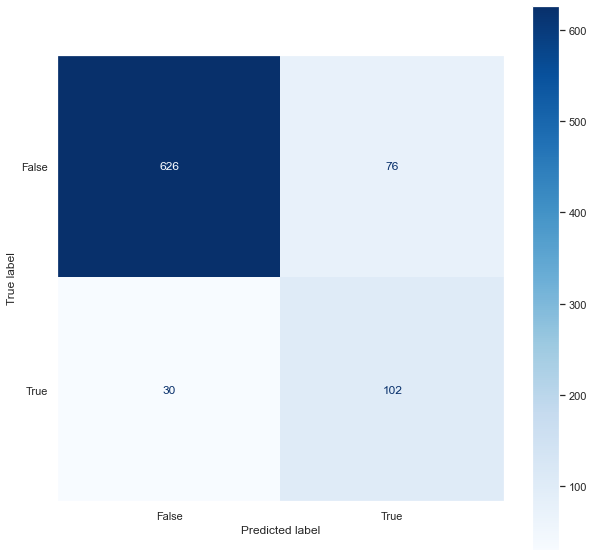

In [24]:
# Visualize your confusion matrix
plot_confusion_matrix(baseline_model, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Model Tuning - Random Forest

#### rf_gs_model_1

In [25]:
if 'rf_gs_model_1.pkl' in os.listdir('models'):
    with open('models/rf_gs_model_1.pkl', 'rb') as f: 
        rf_gs_model_1 = joblib.load(f) 
else:
    rf_pipe = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(random_state=SEED))])
    
    # Define the grid
    grid = [{'RF__class_weight': ['balanced', 'balanced_subsample'], 
         'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]
    
    # Define a grid search
    rf_gs_model_1 = GridSearchCV(rf_pipe, grid, scoring='f1', cv=5)

    # Fit the training data
    rf_gs_model_1.fit(X_train, y_train)
    
    with open('models/rf_gs_model_1.pkl', 'wb') as f:
        joblib.dump(rf_gs_model_1, f)

In [26]:
scores(rf_gs_model_1)

Decision Tree baseline model train scores:
ROC AUC score train: 0.8888033392223336
Log_loss train: 2.639861639488203
              precision    recall  f1-score   support

       False       0.97      0.94      0.95      2148
        True       0.69      0.84      0.76       351

    accuracy                           0.92      2499
   macro avg       0.83      0.89      0.86      2499
weighted avg       0.93      0.92      0.93      2499

[[2013  135]
 [  56  295]]
Decision Tree baseline model test scores:
AUC score test: 0.8736726236726238
Log_loss test: 3.7686875579789167
              precision    recall  f1-score   support

       False       0.97      0.90      0.93       702
        True       0.61      0.85      0.71       132

    accuracy                           0.89       834
   macro avg       0.79      0.87      0.82       834
weighted avg       0.91      0.89      0.90       834

[[631  71]
 [ 20 112]]


In [27]:
rf_gs_model_1.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                         

#### rf_gs_model_2

In [28]:
if 'rf_gs_model_2.pkl' in os.listdir('models'):
    with open('models/rf_gs_model_2.pkl', 'rb') as f: 
        rf_gs_model_2 = joblib.load(f) 
else:
    rf_pipe = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(random_state=SEED))])
    
    # Define the grid
    grid = [{'RF__class_weight': ['balanced_subsample'],
         'RF__criterion': ['gini', 'entropy'],
         'RF__max_depth': [5, 6, 10], 
         'RF__min_samples_split': [9, 10, 40], 
         'RF__min_samples_leaf': [10, 20, 30]}]
    
    # Define a grid search
    rf_gs_model_2 = GridSearchCV(rf_pipe, grid, scoring='f1', cv=5)

    # Fit the training data
    rf_gs_model_2.fit(X_train, y_train)
    
    with open('models/rf_gs_model_2.pkl', 'wb') as f:
        joblib.dump(rf_gs_model_2, f)

In [29]:
scores(rf_gs_model_2)

Decision Tree baseline model train scores:
ROC AUC score train: 0.892145744799376
Log_loss train: 2.6536839583295917
              precision    recall  f1-score   support

       False       0.97      0.94      0.95      2148
        True       0.68      0.85      0.76       351

    accuracy                           0.92      2499
   macro avg       0.83      0.89      0.86      2499
weighted avg       0.93      0.92      0.93      2499

[[2009  139]
 [  53  298]]
Decision Tree baseline model test scores:
AUC score test: 0.8926443926443927
Log_loss test: 3.0232310008239103
              precision    recall  f1-score   support

       False       0.97      0.92      0.95       702
        True       0.67      0.86      0.76       132

    accuracy                           0.91       834
   macro avg       0.82      0.89      0.85       834
weighted avg       0.93      0.91      0.92       834

[[647  55]
 [ 18 114]]


In [30]:
rf_gs_model_2.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'tot...l charge',
       'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                

#### rf_gs_model_3

In [31]:
if 'rf_gs_model_3.pkl' in os.listdir('models'):
    with open('models/rf_gs_model_3.pkl', 'rb') as f: 
        rf_gs_model_3 = joblib.load(f) 
else:
    rf_pipe = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(random_state=SEED))])
    
    # Define the grid
    grid = [{'RF__class_weight': ['balanced_subsample'],
         'RF__n_estimators':[100, 500, 1000],
         'RF__criterion': ['gini', 'entropy'],  
         'RF__max_depth': [9, 10, 20], 
         'RF__min_samples_split': [7, 8, 9], 
         'RF__min_samples_leaf': [9, 10, 15]}]
    
    # Define a grid search
    rf_gs_model_3 = GridSearchCV(rf_pipe, grid, scoring='f1', cv=5)

    # Fit the training data
    rf_gs_model_3.fit(X_train, y_train)
    
    with open('models/rf_gs_model_3.pkl', 'wb') as f:
        joblib.dump(rf_gs_model_3, f)

In [32]:
scores(rf_gs_model_3)

Decision Tree baseline model train scores:
ROC AUC score train: 0.8947062662146461
Log_loss train: 2.5016490099839537
              precision    recall  f1-score   support

       False       0.97      0.94      0.96      2148
        True       0.70      0.85      0.77       351

    accuracy                           0.93      2499
   macro avg       0.84      0.89      0.86      2499
weighted avg       0.94      0.93      0.93      2499

[[2020  128]
 [  53  298]]
Decision Tree baseline model test scores:
AUC score test: 0.8921587671587671
Log_loss test: 3.2303037580890592
              precision    recall  f1-score   support

       False       0.97      0.91      0.94       702
        True       0.65      0.87      0.75       132

    accuracy                           0.91       834
   macro avg       0.81      0.89      0.84       834
weighted avg       0.92      0.91      0.91       834

[[641  61]
 [ 17 115]]


In [33]:
rf_gs_model_3.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'tot...
       'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=Fa

#### rf_gs_model_4

In [34]:
if 'rf_gs_model_4.pkl' in os.listdir('models'):
    with open('models/rf_gs_model_4.pkl', 'rb') as f: 
        rf_gs_model_4 = joblib.load(f) 
else:
    rf_pipe = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(random_state=SEED))])
    
    # Define the grid
    grid = [{'RF__class_weight': ['balanced_subsample'],
         'RF__criterion': ['entropy'],
         'RF__max_features': ['auto', 'sqrt', 'log2', 0.2, 0.4],   
         'RF__min_samples_split': [5, 7, 9], 
         'RF__min_samples_leaf': [8, 9, 10]}]
    
    # Define a grid search
    rf_gs_model_4 = GridSearchCV(rf_pipe, grid, scoring='f1', cv=5)

    # Fit the training data
    rf_gs_model_4.fit(X_train, y_train)
    
    with open('models/rf_gs_model_4.pkl', 'wb') as f:
        joblib.dump(rf_gs_model_4, f)

In [35]:
scores(rf_gs_model_4)

Decision Tree baseline model train scores:
ROC AUC score train: 0.9199294911585414
Log_loss train: 1.2162635884171626
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      2148
        True       0.89      0.86      0.87       351

    accuracy                           0.96      2499
   macro avg       0.93      0.92      0.93      2499
weighted avg       0.96      0.96      0.96      2499

[[2110   38]
 [  50  301]]
Decision Tree baseline model test scores:
AUC score test: 0.9159220409220409
Log_loss test: 1.4908987330612693
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       702
        True       0.87      0.86      0.86       132

    accuracy                           0.96       834
   macro avg       0.92      0.92      0.92       834
weighted avg       0.96      0.96      0.96       834

[[685  17]
 [ 19 113]]


In [36]:
rf_gs_model_4.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'tot...
       'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=Fa

#### rf_gs_model_5

In [37]:
if 'rf_gs_model_5.pkl' in os.listdir('models'):
    with open('models/rf_gs_model_5.pkl', 'rb') as f: 
        rf_gs_model_5 = joblib.load(f) 
else:
    rf_pipe = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(random_state=SEED))])
    
    # Define the grid
    grid = [{'RF__class_weight': ['balanced_subsample'],
         'RF__criterion': ['entropy'],
         'RF__max_features': [0.3, 0.4, 0.5, 0.8],   
         'RF__min_samples_split': [5, 6, 7, 8, 9], 
         'RF__min_samples_leaf': [5, 6, 7, 8, 9, 10]}]
    
    # Define a grid search
    rf_gs_model_5 = GridSearchCV(rf_pipe, grid, scoring='f1', cv=5)

    # Fit the training data
    rf_gs_model_5.fit(X_train, y_train)
    
    with open('models/rf_gs_model_5.pkl', 'wb') as f:
        joblib.dump(rf_gs_model_5, f)

In [38]:
scores(rf_gs_model_5)

Decision Tree baseline model train scores:
ROC AUC score train: 0.9478982635407216
Log_loss train: 0.8292712974880706
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2148
        True       0.92      0.91      0.91       351

    accuracy                           0.98      2499
   macro avg       0.95      0.95      0.95      2499
weighted avg       0.98      0.98      0.98      2499

[[2120   28]
 [  32  319]]
Decision Tree baseline model test scores:
AUC score test: 0.9057562807562807
Log_loss test: 1.3666518189524643
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       702
        True       0.92      0.83      0.87       132

    accuracy                           0.96       834
   macro avg       0.94      0.91      0.92       834
weighted avg       0.96      0.96      0.96       834

[[692  10]
 [ 23 109]]


In [39]:
rf_gs_model_5.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'tot...
       'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=Fa

#### rf_gs_model_6

In [40]:
if 'rf_gs_model_6.pkl' in os.listdir('models'):
    with open('models/rf_gs_model_6.pkl', 'rb') as f: 
        rf_gs_model_6 = joblib.load(f) 
else:
    rf_pipe = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(random_state=SEED))])
    
    # Define the grid
    grid = [{'RF__class_weight': ['balanced_subsample'], 
         'RF__criterion': ['entropy'],
         'RF__max_features': [0.4],   
         'RF__min_samples_split': [2, 3, 4, 5], 
         'RF__min_samples_leaf': [2, 3, 4, 5, 6]}]
    
    # Define a grid search
    rf_gs_model_6 = GridSearchCV(rf_pipe, grid, scoring='f1', cv=5)

    # Fit the training data
    rf_gs_model_6.fit(X_train, y_train)
    
    with open('models/rf_gs_model_6.pkl', 'wb') as f:
        joblib.dump(rf_gs_model_6, f)

In [41]:
scores(rf_gs_model_6)

Decision Tree baseline model train scores:
ROC AUC score train: 0.9772636839675944
Log_loss train: 0.35935085291590335
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2148
        True       0.97      0.96      0.96       351

    accuracy                           0.99      2499
   macro avg       0.98      0.98      0.98      2499
weighted avg       0.99      0.99      0.99      2499

[[2136   12]
 [  14  337]]
Decision Tree baseline model test scores:
AUC score test: 0.9102564102564104
Log_loss test: 1.2838240582962872
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       702
        True       0.92      0.83      0.88       132

    accuracy                           0.96       834
   macro avg       0.95      0.91      0.93       834
weighted avg       0.96      0.96      0.96       834

[[693   9]
 [ 22 110]]


In [42]:
rf_gs_model_6.best_params_

{'RF__class_weight': 'balanced_subsample',
 'RF__criterion': 'entropy',
 'RF__max_features': 0.4,
 'RF__min_samples_leaf': 4,
 'RF__min_samples_split': 2}

#### rf_gs_model_7

In [43]:
if 'rf_model_7.pkl' in os.listdir('models'):
    with open('models/rf_model_7.pkl', 'rb') as f: 
        rf_model_7 = joblib.load(f) 
else:
    rf_model_7 = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features=0.4,
                                  min_samples_leaf=5, min_samples_split=5, 
                                  random_state=SEED))])

    rf_model_7.fit(X_train, y_train)
    
    with open('models/rf_model_7.pkl', 'wb') as f:
        joblib.dump(rf_model_7, f)

In [44]:
scores(rf_model_7)

Decision Tree baseline model train scores:
ROC AUC score train: 0.961854796352003
Log_loss train: 0.5666680373540031
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2148
        True       0.95      0.93      0.94       351

    accuracy                           0.98      2499
   macro avg       0.97      0.96      0.97      2499
weighted avg       0.98      0.98      0.98      2499

[[2131   17]
 [  24  327]]
Decision Tree baseline model test scores:
AUC score test: 0.914044289044289
Log_loss test: 1.242410657343157
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       702
        True       0.93      0.84      0.88       132

    accuracy                           0.96       834
   macro avg       0.95      0.91      0.93       834
weighted avg       0.96      0.96      0.96       834

[[693   9]
 [ 21 111]]


In [45]:
rf_model_7.named_steps

{'trans': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('ss', StandardScaler())]),
                                  Index(['account length', 'area code', 'number vmail messages',
        'total day minutes', 'total day calls', 'total day charge',
        'total eve minutes', 'total eve calls', 'total eve charge',
        'total night minutes', 'total night calls', 'total night charge',
        'total intl minutes', 'total intl calls', 'total intl charge',
        'customer service calls'],
       dtype='object')),
                                 ('categorical',
                                  Pipeline(steps=[('ohe',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  Index(['state', 'international plan', 'voice mail plan'], dtype='object'))]),
 'RF': RandomForestClassifier(class_

In [46]:
list(rf_model_7['RF'].feature_importances_)

[0.03007756256971132,
 0.005068426265298929,
 0.01879948186172565,
 0.12407288944066475,
 0.0311366512396525,
 0.1300853790540464,
 0.06568990999972216,
 0.0259734876154714,
 0.05941558914461539,
 0.037188112772185394,
 0.030553634483572206,
 0.03492595176016247,
 0.037419907784909744,
 0.047502332513429474,
 0.041468089579291406,
 0.1439424998063234,
 3.83837797859961e-19,
 0.0,
 5.60966952670673e-05,
 0.0,
 0.0002261645937161411,
 0.0004947029486425754,
 4.4570727151927005e-05,
 0.0005769060457696402,
 6.908569950387487e-20,
 0.0,
 0.0,
 1.6927749715564071e-19,
 0.0,
 0.0005920621070376566,
 4.41520856051397e-19,
 0.0005603711657856576,
 0.0,
 0.0,
 0.0012259576067204091,
 0.00014517758507405571,
 0.00012607155841857362,
 6.489358666977564e-05,
 0.0003672165050194729,
 0.0002579781681995056,
 8.042072455742257e-05,
 6.123954352435968e-05,
 0.0005086129972716244,
 0.0005291332992669453,
 8.506833169767046e-05,
 0.00014151931608442087,
 0.0,
 0.00018402324681628023,
 7.201547455589574e

In [47]:
# numerical features
X_train_nums = X_train.select_dtypes('number')

# categorical features for OneHotEncoder
X_train_cat = X_train.select_dtypes('object')

numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown = 'ignore',
                         sparse=False))
])


trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

transformed_data = trans.fit_transform(
    X_train, y_train)

In [48]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer


def get_feature_out(estimator, feature_in):
    if hasattr(estimator,'get_feature_names'):
        if isinstance(estimator, _VectorizerMixin):
            # handling all vectorizers
            return [f'vec_{f}' \
                for f in estimator.get_feature_names()]
        else:
            return estimator.get_feature_names(feature_in)
    elif isinstance(estimator, SelectorMixin):
        return np.array(feature_in)[estimator.get_support()]
    else:
        return feature_in


def get_ct_feature_names(ct):
    # handles all estimators, pipelines inside ColumnTransfomer
    # doesn't work when remainder =='passthrough'
    # which requires the input column names.
    output_features = []

    for name, estimator, features in ct.transformers_:
        if name!='remainder':
            if isinstance(estimator, Pipeline):
                current_features = features
                for step in estimator:
                    current_features = get_feature_out(step, current_features)
                features_out = current_features
            else:
                features_out = get_feature_out(estimator, features)
            output_features.extend(features_out)
        elif estimator=='passthrough':
            output_features.extend(ct._feature_names_in[features])
                
    return output_features

X_train_trans = pd.DataFrame(transformed_data, 
             columns=get_ct_feature_names(trans))
X_train_trans

account length  area code  number vmail messages  total day minutes  \
0           1.557709  -0.686080               1.021018           0.672911   
1           0.277302  -0.520308               1.021018           0.055683   
2          -1.304378  -0.520308              -0.593313           1.093665   
3          -0.350349   1.729462              -0.593313           1.038058   
4          -1.128636  -0.520308               1.608048          -0.958202   
...              ...        ...                    ...                ...   
2494        0.453044  -0.520308               1.387912           0.765588   
2495       -1.053318  -0.686080               1.387912          -0.952641   
2496       -0.400561  -0.520308              -0.593313           1.056594   
2497       -0.827364   1.729462              -0.593313          -0.652368   
2498       -0.601409   1.729462              -0.593313           1.019523   

      total day calls  total day charge  total eve minutes  total eve calls  \
0           -0.474435          0.673182          -1.211308         0.084102   
1            0.475655          0.056061           0.542064         1.145824   
2           -0.424430          1.094046           0.164656         0.943591   
3           -0.774463          1.038440          -1.171994        -0.472038   
4           -0.574444         -0.957937          -0.558708         0.791916   
...               ...               ...                ...              ...   
2494         1.375741          0.765860           1.330294         1.651405   
2495         0.475655         -0.952486          -1.911084        -0.067573   
2496         0.425651          1.056975          -0.851591        -0.320364   
2497        -1.024487         -0.652647          -1.301728        -1.786551   
2498         0.175627          1.019904           1.296878        -0.320364   

      total eve charge  total night minutes  ...  state_VA  state_VT  \
0            -1.210549            -1.075965  ...       0.0       0.0   
1             0.542354             1.215965  ...       0.0       0.0   
2             0.165411            -0.651024  ...       0.0       0.0   
3            -1.171236             0.067049  ...       0.0       0.0   
4            -0.558414            -0.123781  ...       0.0       0.0   
...                ...                  ...  ...       ...       ...   
2494          1.330930            -1.070063  ...       0.0       0.0   
2495         -1.911248            -0.721847  ...       0.0       0.0   
2496         -0.852106            -0.249690  ...       0.0       0.0   
2497         -1.300738             0.289356  ...       0.0       0.0   
2498          1.296242             0.232304  ...       0.0       0.0   

      state_WA  state_WI  state_WV  state_WY  international plan_no  \
0          0.0       0.0       0.0       0.0                    1.0   
1          0.0       0.0       0.0       0.0                    1.0   
2          0.0       0.0       0.0       0.0                    0.0   
3          0.0       0.0       0.0       0.0                    1.0   
4          0.0       0.0       0.0       0.0                    1.0   
...        ...       ...       ...       ...                    ...   
2494       0.0       0.0       0.0       0.0                    1.0   
2495       0.0       0.0       0.0       0.0                    1.0   
2496       0.0       0.0       0.0       0.0                    1.0   
2497       0.0       0.0       0.0       0.0                    1.0   
2498       0.0       0.0       0.0       0.0                    1.0   

      international plan_yes  voice mail plan_no  voice mail plan_yes  
0                        0.0                 0.0                  1.0  
1                        0.0                 0.0                  1.0  
2                        1.0                 1.0                  0.0  
3                        0.0                 1.0                  0.0  
4                        0.0                 0.0      

In [49]:
pd.set_option('display.max_rows', None)
features = pd.DataFrame(list(zip(X_train_trans.columns, 
                      rf_model_7['RF'].feature_importances_))).sort_values(1, ascending = False).reset_index()
features

index                       0             1
0      15  customer service calls  1.439425e-01
1       5        total day charge  1.300854e-01
2       3       total day minutes  1.240729e-01
3       6       total eve minutes  6.568991e-02
4      67   international plan_no  6.071078e-02
5       8        total eve charge  5.941559e-02
6      13        total intl calls  4.750233e-02
7      14       total intl charge  4.146809e-02
8      68  international plan_yes  3.972853e-02
9      12      total intl minutes  3.741991e-02
10      9     total night minutes  3.718811e-02
11     11      total night charge  3.492595e-02
12      4         total day calls  3.113665e-02
13     10       total night calls  3.055363e-02
14      0          account length  3.007756e-02
15      7         total eve calls  2.597349e-02
16      2   number vmail messages  1.879948e-02
17     69      voice mail plan_no  1.541070e-02
18     70     voice mail plan_yes  8.882117e-03
19      1               area code  5.068426e-03
20     59                state_TX  1.749300e-03
21     34                state_LA  1.225958e-03
22     56                state_SC  1.020461e-03
23     57                state_SD  8.379565e-04
24     51                state_OH  8.352141e-04
25     29                state_ID  5.920621e-04
26     23                state_DC  5.769060e-04
27     31                state_IN  5.603712e-04
28     43                state_NC  5.291333e-04
29     42                state_MT  5.086130e-04
30     21                state_CO  4.947029e-04
31     38                state_MI  3.672165e-04
32     63                state_WA  3.497604e-04
33     62                state_VT  3.174049e-04
34     39                state_MN  2.579782e-04
35     20                state_CA  2.261646e-04
36     47                state_NJ  1.840232e-04
37     35                state_MA  1.451776e-04
38     66                state_WY  1.423400e-04
39     45                state_NE  1.415193e-04
40     36                state_MD  1.260716e-04
41     60                state_UT  1.213665e-04
42     54                state_PA  1.123867e-04
43     44                state_ND  8.506833e-05
44     40                state_MO  8.042072e-05
45     48                state_NM  7.201547e-05
46     37                state_ME  6.489359e-05
47     65                state_WV  6.156981e-05
48     41                state_MS  6.123954e-05
49     18                state_AR  5.609670e-05
50     22                state_CT  4.457073e-05
51     30                state_IL  4.415209e-19
52     55                state_RI  4.052579e-19
53     16                state_AK  3.838378e-19
54     64                state_WI  2.027874e-19
55     27                state_HI  1.692775e-19
56     24                state_DE  6.908570e-20
57     53                state_OR  0.000000e+00
58     17                state_AL  0.000000e+00
59     33                state_KY  0.000000e+00
60     46                state_NH  0.000000e+00
61     32                state_KS  0.000000e+00
62     25                state_FL  0.000000e+00
63     52                state_OK  0.000000e+00
64     61                state_VA  0.000000e+00
65     49                state_NV  0.000000e+00
66     26                state_GA  0.000000e+00
67     58                state_TN  0.000000e+00
68     28                state_IA  0.000000e+00
69     50                state_NY  0.000000e+00
70     19                state_AZ  0.000000e+00

Top three features that effect the outcome of churn are: 
- 'customer service calls'
- 'total day charge'
- 'total day minutes'

Features 'state' and 'area code' don't contribute to the model. We can get rid of these features. 

### Feature Engineering 

#### Reducing the number of features

Getting rid of 'state' feature.

In [50]:
# assign features and target

X = df.drop(columns=['churn', 'phone number', 'state'])
y = df.churn

# train-test split
SEED = 13
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=SEED)

In [51]:
# numerical features
X_train_nums = X_train.select_dtypes('number')

# categorical features for OneHotEncoder
X_train_cat = X_train.select_dtypes('object')

numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore',
                         sparse=False))
])


trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

#### rf_model_8

In [52]:
if 'rf_model_8.pkl' in os.listdir('models'):
    with open('models/rf_model_8.pkl', 'rb') as f: 
        rf_model_8 = joblib.load(f) 
else:
    rf_model_8 = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features=0.4,
                                  min_samples_leaf=5, min_samples_split=5, 
                                  random_state=SEED))])

    rf_model_8.fit(X_train, y_train)
    
    with open('models/rf_model_8.pkl', 'wb') as f:
        joblib.dump(rf_model_8, f)

In [53]:
scores(rf_model_8)

Decision Tree baseline model train scores:
ROC AUC score train: 0.9606909229814258
Log_loss train: 0.6357748320565658
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2148
        True       0.94      0.93      0.93       351

    accuracy                           0.98      2499
   macro avg       0.96      0.96      0.96      2499
weighted avg       0.98      0.98      0.98      2499

[[2126   22]
 [  24  327]]
Decision Tree baseline model test scores:
AUC score test: 0.9119075369075369
Log_loss test: 1.3666537364522968
              precision    recall  f1-score   support

       False       0.97      0.98      0.98       702
        True       0.90      0.84      0.87       132

    accuracy                           0.96       834
   macro avg       0.94      0.91      0.92       834
weighted avg       0.96      0.96      0.96       834

[[690  12]
 [ 21 111]]


#### rf_model_9

Testing if getting rid of 'area' feature will improve RF model. 

In [54]:
# assign features and target

X = df.drop(columns=['churn', 'phone number', 'state', 'area code'])
y = df.churn

# train-test split
SEED = 13
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=SEED)

In [55]:
# numerical features
X_train_nums = X_train.select_dtypes('number')

# categorical features for OneHotEncoder
X_train_cat = X_train.select_dtypes('object')

numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore',
                         sparse=False))
])


trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

In [56]:
if 'rf_model_9.pkl' in os.listdir('models'):
    with open('models/rf_model_9.pkl', 'rb') as f: 
        rf_model_9 = joblib.load(f) 
else:
    rf_model_9 = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features=0.4,
                                  min_samples_leaf=5, min_samples_split=5, 
                                  random_state=SEED))])

    rf_model_9.fit(X_train, y_train)
    
    with open('models/rf_model_9.pkl', 'wb') as f:
        joblib.dump(rf_model_9, f)

In [57]:
scores(rf_model_9)

Decision Tree baseline model train scores:
ROC AUC score train: 0.9647316525808146
Log_loss train: 0.6081330740764173
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2148
        True       0.93      0.94      0.94       351

    accuracy                           0.98      2499
   macro avg       0.96      0.96      0.96      2499
weighted avg       0.98      0.98      0.98      2499

[[2125   23]
 [  21  330]]
Decision Tree baseline model test scores:
AUC score test: 0.9126197876197876
Log_loss test: 1.32523937674925
              precision    recall  f1-score   support

       False       0.97      0.98      0.98       702
        True       0.91      0.84      0.87       132

    accuracy                           0.96       834
   macro avg       0.94      0.91      0.93       834
weighted avg       0.96      0.96      0.96       834

[[691  11]
 [ 21 111]]


Getting rid of 'area code' feature reduced performance of the model. It is best to keep this feature as a part of modeling. 

#### Feature Engineering

In [58]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [59]:
# Creating additional features

#Total minutes = day + eve + night + intl
df['Total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']\
+ df['total intl minutes']

#Total calls = day + eve + night + intl
df['Total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']\
+ df['total intl calls']

#Total charges = day + eve + night + intl
df['Total_charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge']\
+ df['total intl charge']


#Average daily use in minutes = Total minutes/ account length
#Average daily calls = Total calls/ account length
#Average daily charge = Total charges / account length

df['Average_daily_use_in_minutes'] = df['Total_minutes'] / df['account length']
df['Average_daily_calls'] = df['Total_calls'] / df['account length']
df['Average_daily_charge'] = df['Total_charges'] / df['account length']

In [60]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total intl calls  total intl charge  \
0             45.07  ...                 3               2.70   
1             27.47  ...                 3               3.70   
2             41.38  ...                 5               3.29   
3             50.90  ...                 7               1.78   
4             28.34  ...                 3               2.73   

   customer service calls  churn  Total_minutes  Total_calls  Total_charges  \
0                       1  False          717.2          303          75.56   
1                       1  False          625.2          332          59.24   
2                       0  False          539.4          333          62.29   
3                       2  False          564.8          255          66.80   
4                       3  False          512.0          359          52.09   

   Average_daily_use_in_minutes  Average_daily_calls  Average_daily_charge  
0                      5.603125             2.367188              0.590313  
1                      5.842991             3.102804              0.553645  
2                      3.937226             2.430657              0.454672  
3                      6.723810             3.035714              0.795238  
4                      6.826667             4.786667              0.694533  

[5 rows x 27 columns]

#### rf_model_10

In [61]:
# assign features and target

X = df.drop(columns=['churn', 'phone number', 'state'])
y = df.churn

# train-test split
SEED = 13
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=SEED)

In [62]:
# numerical features
X_train_nums = X_train.select_dtypes('number')

# categorical features for OneHotEncoder
X_train_cat = X_train.select_dtypes('object')

numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore',
                         sparse=False))
])


trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

In [63]:
if 'rf_model_10.pkl' in os.listdir('models'):
    with open('models/rf_model_10.pkl', 'rb') as f: 
        rf_model_10 = joblib.load(f) 
else:
    rf_model_10 = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features=0.4,
                                  min_samples_leaf=5, min_samples_split=5, 
                                  random_state=SEED))])

    rf_model_10.fit(X_train, y_train)
    
    with open('models/rf_model_10.pkl', 'wb') as f:
        joblib.dump(rf_model_10, f)

In [64]:
scores(rf_model_10)

Decision Tree baseline model train scores:
ROC AUC score train: 0.9700854700854701
Log_loss train: 0.2902418184446286
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      2148
        True       1.00      0.94      0.97       351

    accuracy                           0.99      2499
   macro avg       1.00      0.97      0.98      2499
weighted avg       0.99      0.99      0.99      2499

[[2148    0]
 [  21  330]]
Decision Tree baseline model test scores:
AUC score test: 0.9431818181818181
Log_loss test: 0.6212010142969556
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       702
        True       1.00      0.89      0.94       132

    accuracy                           0.98       834
   macro avg       0.99      0.94      0.96       834
weighted avg       0.98      0.98      0.98       834

[[702   0]
 [ 15 117]]


In [65]:
pd.set_option('display.max_rows', None)
features = pd.DataFrame(list(zip(X.columns, 
                      rf_model_10['RF'].feature_importances_))).sort_values(1, ascending = False).reset_index()
features

index                             0         1
0      18                 Total_minutes  0.215586
1      15              total intl calls  0.154184
2      16             total intl charge  0.066367
3      22           Average_daily_calls  0.059742
4      23          Average_daily_charge  0.052103
5       3               voice mail plan  0.045086
6      13            total night charge  0.043020
7       5             total day minutes  0.038808
8      12             total night calls  0.026814
9      14            total intl minutes  0.026767
10      2            international plan  0.023846
11      4         number vmail messages  0.021820
12     10              total eve charge  0.021064
13      7              total day charge  0.020457
14     17        customer service calls  0.019231
15      8             total eve minutes  0.018391
16     21  Average_daily_use_in_minutes  0.018006
17      9               total eve calls  0.017550
18      6               total day calls  0.017427
19     20                 Total_charges  0.015267
20     19                   Total_calls  0.014740
21     11           total night minutes  0.014610
22      0                account length  0.013446
23      1                     area code  0.003455

#### rf_model_11

In [66]:
if 'rf_model_11.pkl' in os.listdir('models'):
    with open('models/rf_model_11.pkl', 'rb') as f: 
        rf_model_11 = joblib.load(f) 
else:
    rf_model_11 = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(criterion='entropy', max_features=0.6,
                                  min_samples_leaf=5, min_samples_split=5,
                                  class_weight = 'balanced',
                                  random_state=SEED))])

    rf_model_11.fit(X_train, y_train)

    with open('models/rf_model_11.pkl', 'wb') as f:
        joblib.dump(rf_model_11, f)


In [67]:
scores(rf_model_11)

Decision Tree baseline model train scores:
ROC AUC score train: 0.9786324786324787
Log_loss train: 0.2073155846033064
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      2148
        True       1.00      0.96      0.98       351

    accuracy                           0.99      2499
   macro avg       1.00      0.98      0.99      2499
weighted avg       0.99      0.99      0.99      2499

[[2148    0]
 [  15  336]]
Decision Tree baseline model test scores:
AUC score test: 0.946969696969697
Log_loss test: 0.5797876133438253
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       702
        True       1.00      0.89      0.94       132

    accuracy                           0.98       834
   macro avg       0.99      0.95      0.97       834
weighted avg       0.98      0.98      0.98       834

[[702   0]
 [ 14 118]]


In [68]:
pd.set_option('display.max_rows', None)
features = pd.DataFrame(list(zip(X.columns, 
                      rf_model_11['RF'].feature_importances_))).sort_values(1, ascending = False).reset_index()
features

index                             0         1
0      18                 Total_minutes  0.242094
1      15              total intl calls  0.159377
2      22           Average_daily_calls  0.086885
3      16             total intl charge  0.057264
4      13            total night charge  0.046882
5       3               voice mail plan  0.032137
6      12             total night calls  0.031584
7      23          Average_daily_charge  0.031064
8       5             total day minutes  0.028837
9       2            international plan  0.027423
10     14            total intl minutes  0.026072
11     10              total eve charge  0.020434
12      4         number vmail messages  0.020396
13      7              total day charge  0.019481
14     17        customer service calls  0.018310
15     11           total night minutes  0.018307
16      9               total eve calls  0.016063
17      8             total eve minutes  0.015355
18     20                 Total_charges  0.014608
19     21  Average_daily_use_in_minutes  0.013980
20      6               total day calls  0.013758
21     19                   Total_calls  0.012841
22      0                account length  0.011415
23      1                     area code  0.003634

##### Features' correlation to the target

In [69]:
# Creating DataFrames for transformed data so we can plot shap visuals. 

X_train_trans = trans.fit_transform(X_train)
X_test_trans = trans.fit_transform(X_test)

X_train_trans = pd.DataFrame(X_train_trans, 
             columns=get_ct_feature_names(trans))

X_test_trans = pd.DataFrame(X_test_trans, 
             columns=get_ct_feature_names(trans))

In [70]:
# rerunning final RandomForest model 

rf_clf = RandomForestClassifier(criterion='entropy', max_features=0.6,
                                  min_samples_leaf=5, min_samples_split=5,
                                  class_weight = 'balanced',
                                  random_state=SEED)
rf_clf.fit(X_train_trans, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=0.6, min_samples_leaf=5,
                       min_samples_split=5, random_state=13)

In [71]:
# importing shap libraries
import shap
from shap import KernelExplainer, TreeExplainer, Explainer

shap.initjs()

In [73]:
explainer = Explainer(rf_clf, X_train_trans)
shap_values = explainer.shap_values(X_train_trans, check_additivity=False)

 97%|=================== | 4865/4998 [00:26<00:00]       

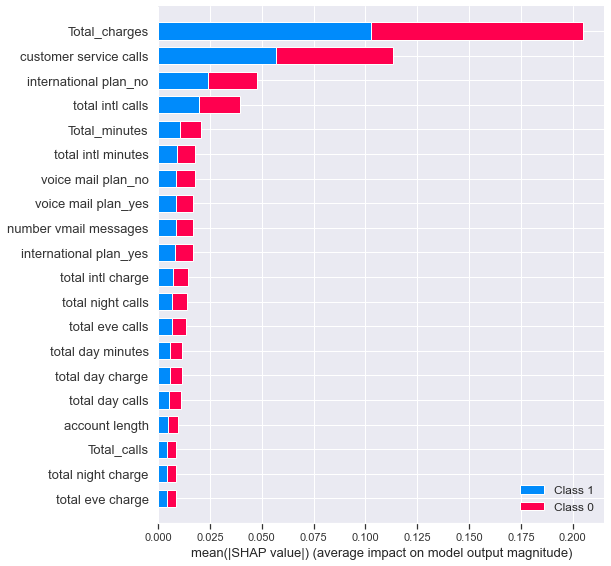

In [76]:
shap.summary_plot(shap_values, X_train_trans, plot_type="bar")

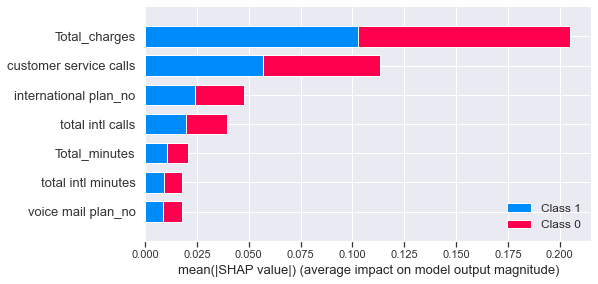

In [78]:
shap.summary_plot(shap_values, X_train_trans, plot_type="bar", max_display=7 )

In [77]:
shap.force_plot(explainer.expected_value[0], shap_values[0])

In [79]:
# Fits the explainer
explainer = shap.Explainer(rf_clf.predict, X_test_trans)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_trans)

Permutation explainer: 835it [03:56,  3.41it/s]                         


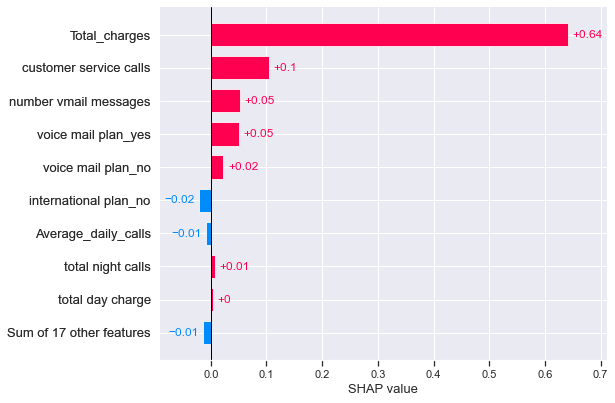

In [80]:
shap.plots.bar(shap_values[0])

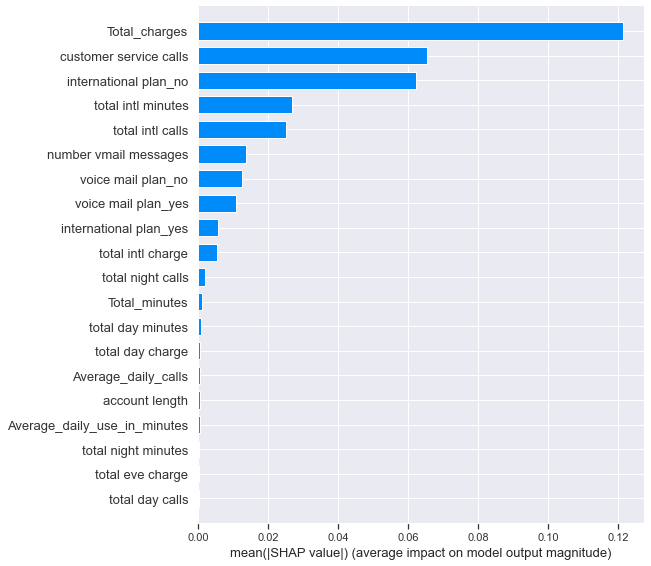

In [83]:
shap.summary_plot(shap_values, X_test_trans, plot_type="bar")

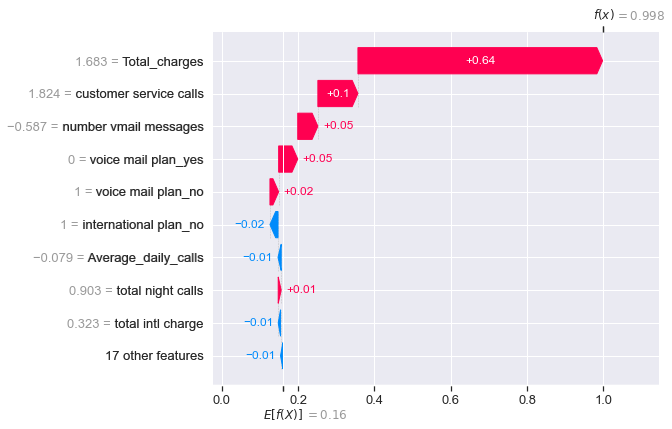

In [98]:
shap.plots.waterfall(shap_values[0])

In [87]:
shap.plots.force(shap_values[1])

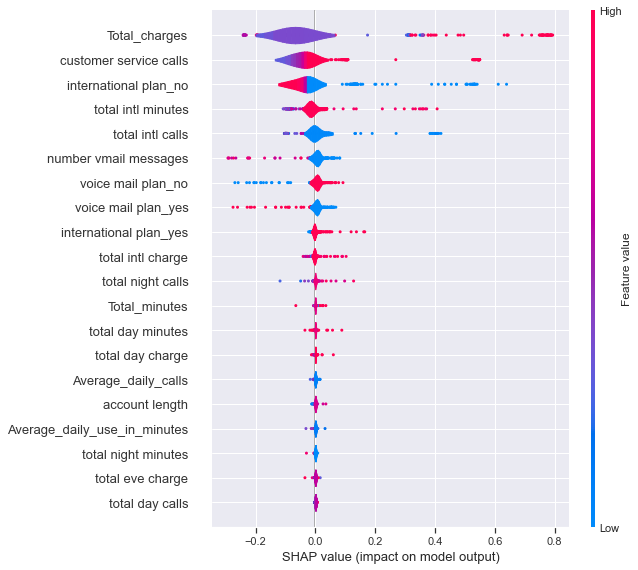

In [84]:
shap.summary_plot(shap_values, plot_type='violin')

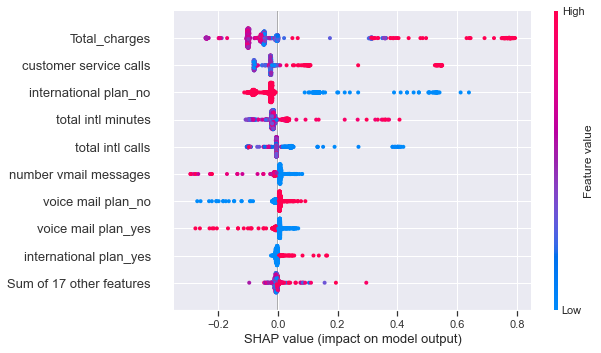

In [85]:
shap.plots.beeswarm(shap_values)

In [ ]:
for name in X_test_trans.columns:
    shap.dependence_plot(name, shap_values[1], X_test_trans, display_features=X_display)

In [ ]:
explainer = shap.KernelExplainer(rf_clf, X_test_trans)
shap_values = explainer.shap_values(X_train_trans)

In [ ]:
import shap
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])

In [ ]:
shap.initjs()

shap.summary_plot(shap_values,
                  features = x_train.iloc[0:50,:]
                  )

In [ ]:
plt.scatter(explainer[:,'total day minutes'], color=explainer)

### kNN Vanilla model

In [ ]:
knn_baseline_model_pipe = Pipeline(steps=[
    ('trans', trans),
    ('knn', KNeighborsClassifier())
])

In [ ]:
knn_baseline_model_pipe.fit(X_train, y_train)
knn_baseline_model_pipe.score(X_train, y_train)

#### kNN 

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

# Note you use the part of the pipeline's name `NAME__{parameter}`
parameters = {
    'scaler__with_mean': [True, False],
    'clf__n_neighbors': [1, 3, 5],
    'clf__metric': ['minkowski', 'manhattan'],
    'clf__weights': ['uniform', 'distance']
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train.select_dtypes('float64'), y_train)
y_pred = cv.predict(X_test.select_dtypes('float64'))

### Logistic Regression Vanilla model

#### lr_model_1

In [ ]:
if 'lr_model_1.pkl' in os.listdir('models'):
    with open('models/lr_model_1.pkl', 'rb') as f: 
        lr_model_1 = joblib.load(f) 
else:
    lr_model_1 = Pipeline(steps=[
    ('trans', trans), 
    ('lr', LogisticRegression(random_state=SEED))])

    lr_model_1.fit(X_train, y_train)

    with open('models/lr_model_1.pkl', 'wb') as f:
        joblib.dump(lr_model_1, f)


In [ ]:
scores(lr_model_1)

In [ ]:
lr_model_1.get_params()

### RandomizedSearchCV with Logistic Regression

#### lr_rs_model_2

In [ ]:
if 'lr_rs_model_2.pkl' in os.listdir('models'):
    with open('models/lr_rs_model_2.pkl', 'rb') as f: 
        lr_rs_model_2 = joblib.load(f) 
else:
    lr_pipe = Pipeline(steps=[
    ('trans', trans),
    ('lr', LogisticRegression(class_weight='balanced'))
    ])

    lr_grid = {'lr__penalty': ['none', 'l1', 'l2', 'elasticnet'],
           'lr__solver': ['liblinear', 'saga'],
           'lr__C': stats.uniform(loc=0, scale=10),
           'lr__max_iter': [100, 1000, 10000], 
           'lr__l1_ratio': stats.expon(scale=0.2), 
           }

    lr_rs_model_2 = RandomizedSearchCV(estimator=lr_pipe,
                                   param_distributions=lr_grid,
                                   scoring = 'f1', cv=5,
                                   random_state=SEED)
    
    lr_rs_model_2.fit(X_train, y_train)

    with open('models/lr_rs_model_2.pkl', 'wb') as f:
        joblib.dump(lr_rs_model_2, f)


In [ ]:
scores(lr_rs_model_2)

In [ ]:
pd.DataFrame(lr_rs_model_2.cv_results_).sort_values('rank_test_score')

#### lr_rs_model_3

In [ ]:
if 'lr_rs_model_3.pkl' in os.listdir('models'):
    with open('models/lr_rs_model_3.pkl', 'rb') as f: 
        lr_rs_model_3 = joblib.load(f) 
else:
    lr_pipe = Pipeline(steps=[
    ('trans', trans),
    ('lr', LogisticRegression(class_weight='balanced'))
    ])

    lr_grid = {'lr__penalty': ['none', 'l2'],
           'lr__solver': ['newton-cg', 'lbfgs','sag'],
           'lr__C': stats.uniform(loc=0, scale=10),
           'lr__max_iter': [100, 1000, 10000]
           }

    lr_rs_model_3 = RandomizedSearchCV(estimator=lr_pipe,
                                   param_distributions=lr_grid,
                                   scoring = 'f1', cv=5,
                                   random_state=SEED)
    
    lr_rs_model_3.fit(X_train, y_train)

    with open('models/lr_rs_model_3.pkl', 'wb') as f:
        joblib.dump(lr_rs_model_3, f)


In [ ]:
scores(lr_rs_model_3)

In [ ]:
pd.DataFrame(lr_rs_model_3.cv_results_).sort_values('rank_test_score')

#### lr_rs_model_4

In [ ]:
if 'lr_rs_model_4.pkl' in os.listdir('models'):
    with open('models/lr_rs_model_4.pkl', 'rb') as f: 
        lr_rs_model_4 = joblib.load(f) 
else:
    lr_pipe = Pipeline(steps=[
    ('trans', trans),
    ('lr', LogisticRegression(class_weight='balanced'))
    ])

    lr_grid = {'lr__penalty': ['l2'],
           'lr__solver': ['lbfgs'],
           'lr__C': stats.uniform(loc=5, scale=15),
           'lr__max_iter': [5000, 10000, 50000]
           }

    lr_rs_model_4 = RandomizedSearchCV(estimator=lr_pipe,
                                   param_distributions=lr_grid,
                                   scoring = 'f1', cv=5,
                                   random_state=SEED)
    
    lr_rs_model_4.fit(X_train, y_train)

    with open('models/lr_rs_model_4.pkl', 'wb') as f:
        joblib.dump(lr_rs_model_4, f)

In [ ]:
scores(lr_rs_model_4)

In [ ]:
pd.DataFrame(lr_rs_model_4.cv_results_).sort_values('rank_test_score')

### GridSearchCV with Logistic Regression

#### lr_gs_model_5

In [ ]:
if 'lr_gs_model_5.pkl' in os.listdir('models'):
    with open('models/lr_gs_model_5', 'rb') as f: 
        lr_gs_model_5 = joblib.load(f) 
else:
    lr_pipe = Pipeline(steps=[
    ('trans', trans),
    ('lr', LogisticRegression(class_weight='balanced', random_state=SEED))
    ])

    lr_grid = {'lr__penalty': ['l2'],
           'lr__solver': ['lbfgs'],
           'lr__C': [10, 12, 14, 15],
           'lr__max_iter': [40000, 50000, 100000]
           }

    lr_gs_model_5 = GridSearchCV(lr_pipe, lr_grid, scoring='f1', cv=5)

    lr_gs_model_5.fit(X_train, y_train)

    with open('models/lr_gs_model_5.pkl', 'wb') as f:
        joblib.dump(lr_gs_model_5, f)

In [ ]:
scores(lr_gs_model_5)

In [ ]:
pd.DataFrame(lr_gs_model_5.cv_results_).sort_values('rank_test_score')

It appears that Logistic Regression model might not be the best model for this problem. After trying multiple variations of hyper parameters, f1 score hasn't moved at all. 

## Conclusion